<a href="https://colab.research.google.com/github/alanagadelha/Python-Training/blob/master/Atividade_pratica_03_%5BAlanaGadelha%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="left"> Uso de dados para Ciências da Terra e Ambiental em Python 1 (CTP1) </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://ppgdot-uff.com.br/wp-content/uploads/2024/02/logo-programa-colorido.png" alt="drawing" width="300";"/>

Professor: Leonardo Miquelutti

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)  
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade Prática 03 - Análise de Séries Temporais



# Dados climáticos do Brasil

Nessa atividade, você lidará com dados climáticos do Brasil.

## Download dos dados

Primeiramente, importe as bibliotecas necessárias e crie a pasta `data`.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import urllib.request
import zipfile
import shutil
import pandas as pd

In [ ]:
# Set the working directory#
print(os.getcwd())
os.chdir('/content')
data_dir = 'data'
if not os.path.exists(data_dir):
  os.makedirs(data_dir)
  print(f"Directory '{data_dir}' created successfully!!!.")
else:
  print(f"Directory '{data_dir}' already created!!!.")


/content
Directory 'data' already created!!!.


A função `get_inmet_files` baixa os dados climáticos de uma única estação da base de dados do *Instituto Nacional de Metereologia* (INMET).

In [ ]:
# get data from inmet
def get_inmet_files(id,
                    dst = 'data',
                    url = 'https://portal.inmet.gov.br/uploads/dadoshistoricos',
                    yr_start = 2000,
                    yr_end = 2018):
  """
  Download meteorological data from INMET

  Parameters
  ----------
  id : str
      The station ID is a code that you find at https://mapas.inmet.gov.br/,
      before the name of the selected station.
      Ex: 'A618' for station 'A618 - Teresópolis-Parque Nacional'

  dst : str
      destination folder

  url : str
      url for download. Currently works only for INMET data

  yr_start : int
      data starting year

  yr_end : int
      data ending year

  Returns
  -------
  None

  """
  # iterate over the years
  for year in range(yr_start,yr_end+1):

    # download data for `year`
    filename = os.path.join(dst, str(year) + '.zip')
    src = os.path.join(url, str(year) + '.zip')
    urllib.request.urlretrieve(url = src,
                               filename = filename)
    print('\n')
    print('Downloaded', filename.partition('/')[-1], 'from', src)

    # iterate over the csv files in the zip file
    archive = zipfile.ZipFile(filename, 'r')
    for input_file in archive.namelist():
      # looks for desired station
      if input_file.find(id) != -1:
        # extract, copy, and remove files
        with zipfile.ZipFile(filename, 'r') as zipObj:
          zipObj.extract(input_file)
          shutil.copyfile(input_file, 'data/' + input_file.partition('/')[-1])
          os.remove(input_file)
          os.rmdir(input_file.partition('/')[0])
        print('Extracted', input_file)

    # delete zip file
    os.remove(filename)

Para pegar os dados:

1. veja as estações disponíveis em https://mapas.inmet.gov.br/.
1. escolha uma estação **AUTOMÁTICA** (círculo verde) de um local que tenha alguma relevância para você, **preferencialmente** fora da Grande Rio.
1. Veja seu **id**, o número relacionado ao nome. Por exemplo, Uberlândia tem o id `A507`
1. coloque o **id** no campo apropriado na célula abaixo (atualmente preenchida com o código `A507`)
1. Execute a célula abaixo. Os dados de cada ano disponível aparecerá na pasta `data`.

## Comentário => Alana
## Estação automática da cidade de Rio Grande (RS):

* A estação, cujo `id='A303'` foi escolhida para este trabalho por possuir uma boa quantidade de dados para análises de séries temporais!


In [ ]:
#id = 'A303'
id = 'A802'
get_inmet_files(id)



Downloaded 2000.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2000.zip


Downloaded 2001.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2001.zip
Extracted 2001/INMET_S_RS_A802_RIO GRANDE_16-11-2001_A_31-12-2001.CSV


Downloaded 2002.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2002.zip
Extracted 2002/INMET_S_RS_A802_RIO GRANDE_01-01-2002_A_31-12-2002.CSV


Downloaded 2003.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2003.zip
Extracted 2003/INMET_S_RS_A802_RIO GRANDE_01-01-2003_A_31-12-2003.CSV


Downloaded 2004.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2004.zip
Extracted 2004/INMET_S_RS_A802_RIO GRANDE_01-01-2004_A_31-12-2004.CSV


Downloaded 2005.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2005.zip
Extracted 2005/INMET_S_RS_A802_RIO GRANDE_01-01-2005_A_31-12-2005.CSV


Downloaded 2006.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2006.zip
Extracted 2006/INMET_S_RS_A802_RIO

## Importação dos dados

Abaixo está um exemplo para importar **um único arquivo** do INMET como `pandas DataFrame` usando a função `read_csv`.

```python
filename = "/content/data/INMET_SE_MG_A507_UBERLANDIA_01-01-2005_A_31-12-2005.CSV"
data = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",")
```

Como no Brasil o separador decimal é a vírgula, geralmente, isso deve ser especificado como argumento de importação.

## Exercício 01 - `na_values` (10 pontos)

Importe um arquivo e descubra o valor do `na_values`.

# Exercício 01 - Alana
Vamos começar esse exercício explorando os dados para entender o **dataset**. O comando do describe abaixo é nos dá um panorama geral para avaliarmos a distribuição dos dados. Com ele vemos que todas as colunas possuem dados **"-9999"** e a coluna *Unnamed*: possue dados com **"NaN"**.

Significado

* count	Quantidade de valores não nulos (não NaN) na coluna.
* mean	Média aritmética dos valores.
* std	Desvio padrão (variabilidade dos dados).
* min	Valor mínimo encontrado.
* 25%	Primeiro quartil (25% dos dados estão abaixo deste valor).
* 50%	Mediana (50% dos dados estão abaixo; valor central).
* 75%	Terceiro quartil (75% dos dados estão abaixo).
* max	Valor máximo encontrado.




In [ ]:
# Exercício 01
import pandas as pd

filename = "/content/data/INMET_S_RS_A802_RIO GRANDE_01-01-2011_A_31-12-2011.CSV"
print(filename)
data = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",")
data.describe()
colunas = data.columns
print(colunas)


# Converte a coluna de data para datetime
data['DATA (YYYY-MM-DD)'] = pd.to_datetime(data['DATA (YYYY-MM-DD)'], errors='coerce')

# Define a coluna de data como índice
data.set_index('DATA (YYYY-MM-DD)', inplace=True)

# Nome da coluna de precipitação
col_prec = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'

# Converte para número removendo erros
data[col_prec] = pd.to_numeric(data[col_prec])

# Filtra os dados de outubro de 2011
outubro_2011 = data.loc[(data.index.year == 2011) & (data.index.month == 3) & (data.index.day == 10)]

# Visualiza os dados
print(outubro_2011[[col_prec]].head(100))


/content/data/INMET_S_RS_A802_RIO GRANDE_01-01-2011_A_31-12-2011.CSV
Index(['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (KJ/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'Unnamed: 19'],
      dtype='object')
       

In [ ]:
# Continuação do Exercício 01

#Procurando os principais tipos de valores ausentes : "NaN", "nan", "" (string vazia), " - ", "///", "null", "n/a", "-9999"

df = pd.read_csv(filename, delimiter=';', header=8, encoding="ISO-8859-1",engine='python', decimal=",",
                 na_values=["///", "-9999", "NaN", "nan" ,"null", "n/a", "", " -", "NaT"])
print("#####Totais dos valores ausentes nesse arquivo CSV =>#####\n")
print(df.isna().sum())
missing_percent = df.isna().mean() * 100
print("\n####Porcentagem dos valores faltantes####\n", missing_percent.sort_values(ascending=True))

#####Totais dos valores ausentes nesse arquivo CSV =>#####

DATA (YYYY-MM-DD)                                           0
HORA (UTC)                                                  0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            9
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       9
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)            10
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)           10
RADIACAO GLOBAL (KJ/m²)                                  4053
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                9
TEMPERATURA DO PONTO DE ORVALHO (°C)                        9
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                 10
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                 10
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)           10
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)           10
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                   10
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                   10
UMIDADE RE

## Exercício 02 - concatenando `pandas DataFrame` (10 pontos)

A função `pd.concat()` concatena dois ou mais `pandas DataFrame`.

Por exemplo, `result = pd.concat([df1, df2])` concatena os DataFrames `df1` e  `df2` em `result`.

Concatene todos os pandas DataFrames para as análises posteriores.

Construa um `for` na célula abaixo para concatenar em um único `pandas DataFrame` todos os arquivos contidos na pasta `data`.  
Em seguida, use o método `.set_index()` (por exemplo, `data.set_index('nome-da-coluna',inplace=True)`) para definir a coluna das datas como índice.
* Dica 01: pacote `glob` descrito na [Aula 04 - Fundamental de Python VI - if](https://colab.research.google.com/drive/15C_BtbQ1vazt1r8042T8DEAHFGTOM3aO?usp=sharing).
* Dica 02: use `data = pd.DataFrame()` para criar um DataFrame vazio.
* Dica 03: olhe a seção _Expand Loop To Include More Tasks_ da [Aula 03 - Fundamental de Python V - loops](https://colab.research.google.com/drive/14WFICVwSdzha6aIqeK6xxBRGswWnUGK5?usp=sharing).

Apesar das dicas, a forma como você lê e concatena os `DataFrame` é opcional.  
**Entretanto, é obrigatório usar um `for` para isso.**  
**E não se esqueça dos seguintes argumentos na hora de importar os dados:**
*  `na_values` (descoberto no Exercício 01)
*  `parse_dates`. Clique [aqui](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e) para encontrar auxílio sobre como usar `parse_dates` quando há mais de uma coluna com datas.

In [ ]:
#Exercício-02

import pandas as pd
import glob
from google.colab import files

# Caminhos dos arquivos CSV
caminhos = glob.glob("/content/data/INMET_S_RS_A802*.CSV")
print(f"Arquivos encontrados: {len(caminhos)}")

# Lista de valores ausentes
valores_ausentes = ["///", "-9999", "NaN", "nan", "null", "n/a", "", "NaT"]

# DataFrame acumulador
data = pd.DataFrame()

# Leitura e concatenação dos arquivos
for arquivo in caminhos:
    df = pd.read_csv(
        arquivo,
        delimiter=';',
        encoding="ISO-8859-1",
        engine='python',
        decimal=",",
        skiprows=8,
        na_values=valores_ausentes
    )
    data = pd.concat([data, df], ignore_index=True)

print(f"\nDataFrame combinado: {data.shape}")

# Conversão de data e hora
if 'DATA (YYYY-MM-DD)' in data.columns and 'HORA (UTC)' in data.columns:
    data['DataHora'] = pd.to_datetime(
        data['DATA (YYYY-MM-DD)'] + ' ' + data['HORA (UTC)'],
        errors='coerce'
    )
    data.drop(columns=['DATA (YYYY-MM-DD)', 'HORA (UTC)'], inplace=True)
    data.set_index('DataHora', inplace=True)
    print("Coluna 'DataHora' criada e definida como índice.")
else:
    print("Colunas de data e hora não foram encontradas!")

# Remove linhas com valores ausentes na coluna de precipitação
col_prec = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
if col_prec in data.columns:
    data = data.dropna(subset=[col_prec])
    print(f"Linhas após remoção de valores ausentes em '{col_prec}': {data.shape}")
else:
    print(f"A coluna '{col_prec}' não foi encontrada!")

# Salvar como CSV
#arquivo_saida = "dados_filtrados.csv"
#data.to_csv(arquivo_saida, sep=";", encoding="ISO-8859-1")
#print(f"Arquivo salvo como: {arquivo_saida}")

# Download no computador
#files.download(arquivo_saida)


Arquivos encontrados: 18

DataFrame combinado: (150120, 20)
Coluna 'DataHora' criada e definida como índice.
Linhas após remoção de valores ausentes em 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': (128185, 18)


In [ ]:
# Analisando os dados em Detalhes, por meio da Biblioteca `ProfileReport` que mostra um panorama geral dos dados

!pip install ydata-profiling -q
from ydata_profiling import ProfileReport
ProfileReport(data)

# Pre-processamento:
Depois da concatenação mais valores indefinidos apareceram, os quais são conhecidos como **NaT**. Desta forma, foi necessário realizar um novo pré-processamento nos dados para excluir os índices faltantes.

In [ ]:
#Pre-processamento
print(data.columns.tolist())

# Garantindo que o índice seja datetime
data = data[~data.index.isna()]  # remove linhas com índice faltando
data = data.sort_index()         # ordena cronologicamente

# Extrair a coluna de precipitação e limpar NaNs
prec = data["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].dropna()
prec = prec.sort_index()
print(prec)


# Limpa espaços e normaliza colunas (remove acentos)
import unicodedata
data.columns = [unicodedata.normalize('NFKD', col).encode('ASCII', 'ignore').decode('utf-8').strip()
                for col in data.columns]
tempAR = data["TEMPERATURA DO AR - BULBO SECO, HORARIA (C)"].dropna()
tempAR = tempAR.sort_index()
print(tempAR)


# Encontrando o máximo valor de precipitação Horária
max_prec = prec.max()            # valor máximo
max_prec_time = prec.idxmax()    # data/hora correspondente

print(f"\nPRECIPITAÇÃO MÁXIMA HORÁRIA")
print(f"\nValor máximo horário de precipitação: {max_prec} mm")
print(f"Data e hora do evento: {max_prec_time}")

['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)', 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)', 'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)', 'Unnamed: 19']
DataHora
2001-11-17 17:00:00    0.0
2001-11-17 18:00:00    0.0
2001-11-17 19:00:00    0.0
2001-11-17 20:00:00    0.0
2001-11-17 21:00:00    0.0
                      ... 
2018-12-31 19:00:00    0.0
2018-12-31 20:00:00    0.0
2018-12-31 21:00:00 

## Exercício 03 (10 pontos)

Crie um gráfico **em barras** da pluviosidade de todo o período de dados disponível, da maneira que se apresentou após a concatenação.
* Formate os rótulos do eixo x para ficar legígel
* adicione título
* adicione nome aos eixos x e y

## Exercício 03 - Alana.

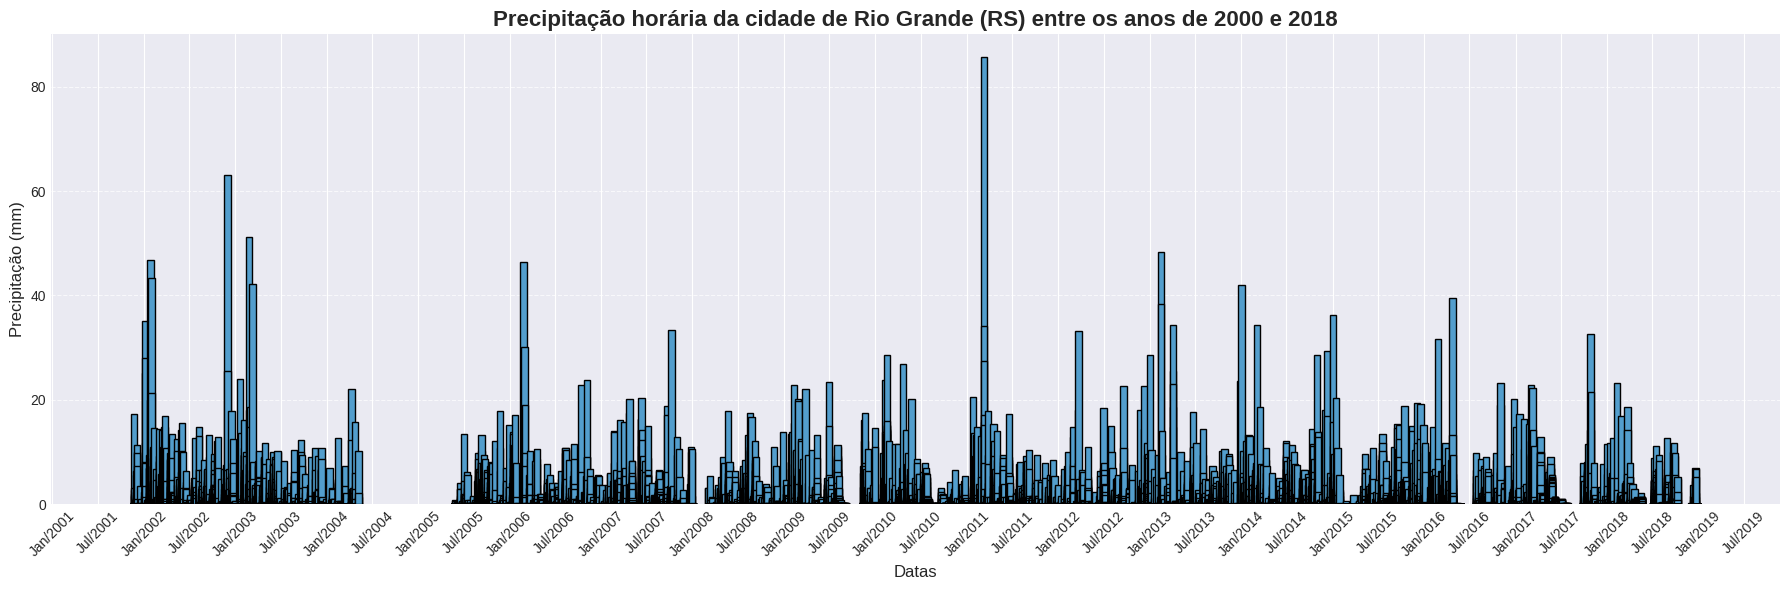

In [ ]:
# Exercício - 03
# gráfico em barras da precipitação de todo o período de dados disponível.

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use("seaborn-v0_8-darkgrid")

plt.figure(figsize=(18, 6))

# Gráfico de barras
plt.bar(
    prec.index,
    prec.values,
    width=25,
    color="#539ecd",
    edgecolor="black"
)

# Título
plt.title("Precipitação horária da cidade de Rio Grande (RS) entre os anos de 2000 e 2018", fontsize=16, fontweight='bold')
plt.xlabel("Datas", fontsize=12)
plt.ylabel("Precipitação (mm)", fontsize=12)

# Eixo X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.xticks(rotation=45, fontsize=10)

# Grade horizontal
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajuste do layout
plt.tight_layout()
plt.show()



## Exercício 04 (40 pontos)

Crie 4 gráficos em barras da pluviosidade de todo o período de dados disponível reamostrado nas formas:
1. diária
1. mensal
1. sazonal (por estação)
1. anual

Dicas:
* `fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)`
* se necesssário, formate os rótulos do eixo x para ficar legígel
* adicione título
* adicione nome aos eixos x e y

## Precipitação acumulada diária





PRECIPITAÇÃO MÁXIMA DIÁRIA

Valor máximo diário de precipitação: 185.79999999999998 mm
Data e hora do evento: 2011-03-10 00:00:00


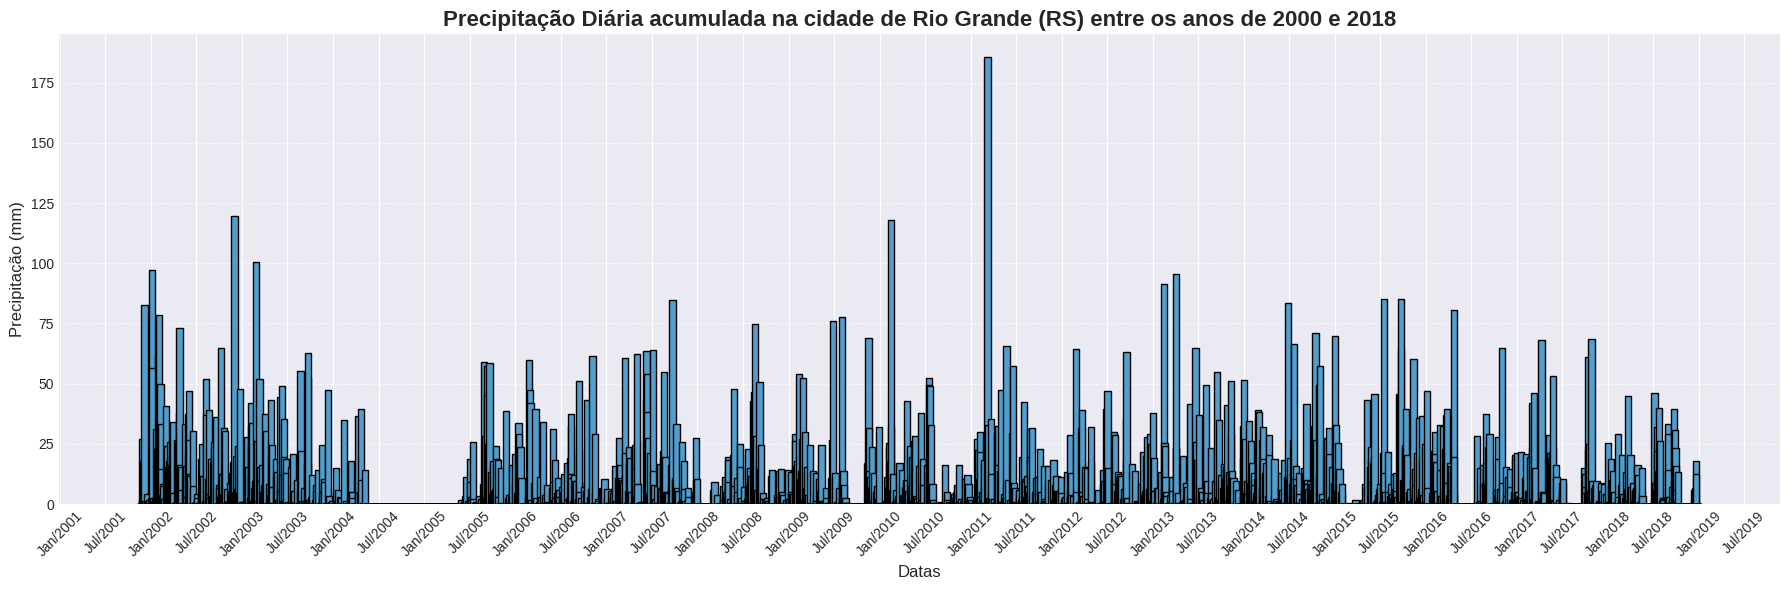

In [ ]:
# exercício 04 - resample
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(18, 6))

# Para a confecção dos grágicos foi usada a função resample
prec_diaria = prec.resample("D").sum()
prec_max = prec_diaria.max()
prec_max_time = prec_diaria.idxmax()
print(f"\nPRECIPITAÇÃO MÁXIMA DIÁRIA")
print(f"\nValor máximo diário de precipitação: {prec_max} mm")
print(f"Data e hora do evento: {prec_max_time}")

# Gráfico de barras
plt.bar(
    prec_diaria.index,
    prec_diaria.values,
    width=25,
    color="#539ecd",
    edgecolor="black"
)

# Título
plt.title("Precipitação Diária acumulada na cidade de Rio Grande (RS) entre os anos de 2000 e 2018", fontsize=16, fontweight='bold')
plt.xlabel("Datas", fontsize=12)
plt.ylabel("Precipitação (mm)", fontsize=12)

# Eixo X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.xticks(rotation=45, fontsize=10)

# Grade horizontal
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajuste do layout
plt.tight_layout()
plt.show()

#Utilizada para verificação dos dados
#data.to_csv("meus_dados.csv", sep=";", encoding="ISO-8859-1")
#from google.colab import files
#files.download("meus_dados.csv")


## Gráfico de zoom no período de maior precipitação, apenas para uma melhor análises dos dados.


PRECIPITAÇÃO MÁXIMA DIÁRIA

Valor máximo diário de precipitação: 185.79999999999998 mm
Data e hora do evento: 2011-03-10 00:00:00


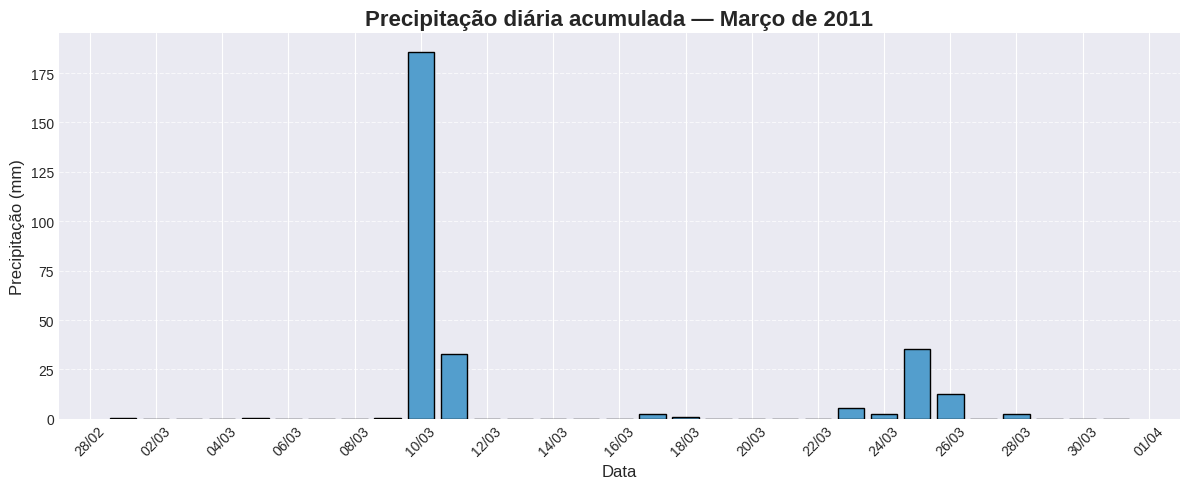

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Reamostragem diária
prec_diaria = prec.resample("D").sum()
prec_max = prec_diaria.max()
prec_max_time = prec_diaria.idxmax()

print(f"\nPRECIPITAÇÃO MÁXIMA DIÁRIA")
print(f"\nValor máximo diário de precipitação: {prec_max} mm")
print(f"Data e hora do evento: {prec_max_time}")

# ------------------------------
# 1. FILTRAR O MÊS DE MARÇO DO ANO DO EVENTO DE PRECIPITAÇÃO MÁXIMA
# ------------------------------
ano_max = prec_max_time.year
mes = 3  # Março
inicio = pd.Timestamp(year=ano_max, month=mes, day=1)
fim = pd.Timestamp(year=ano_max, month=mes, day=31)

prec_outubro = prec_diaria.loc[inicio:fim]

# ------------------------------
# 2. PLOTAR O MÊS DE MARÇO COM ZOOM
# ------------------------------
plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(12, 5))

plt.bar(
    prec_outubro.index,
    prec_outubro.values,
    width=0.8,
    color="#539ecd",
    edgecolor="black"
)

plt.title(f"Precipitação diária acumulada — Março de {ano_max}", fontsize=16, fontweight='bold')
plt.xlabel("Data", fontsize=12)
plt.ylabel("Precipitação (mm)", fontsize=12)

# Eixo X formatado por dia
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.xticks(rotation=45, fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Precipitação acumulada mensal:

Aqui foram plotados em conjunto a:
1.   Precipitação; e a
2.   Temperatura

Apenas para uma análise mais detalhada do comportamento climático da Cidade de Rio Grande (RS).



---



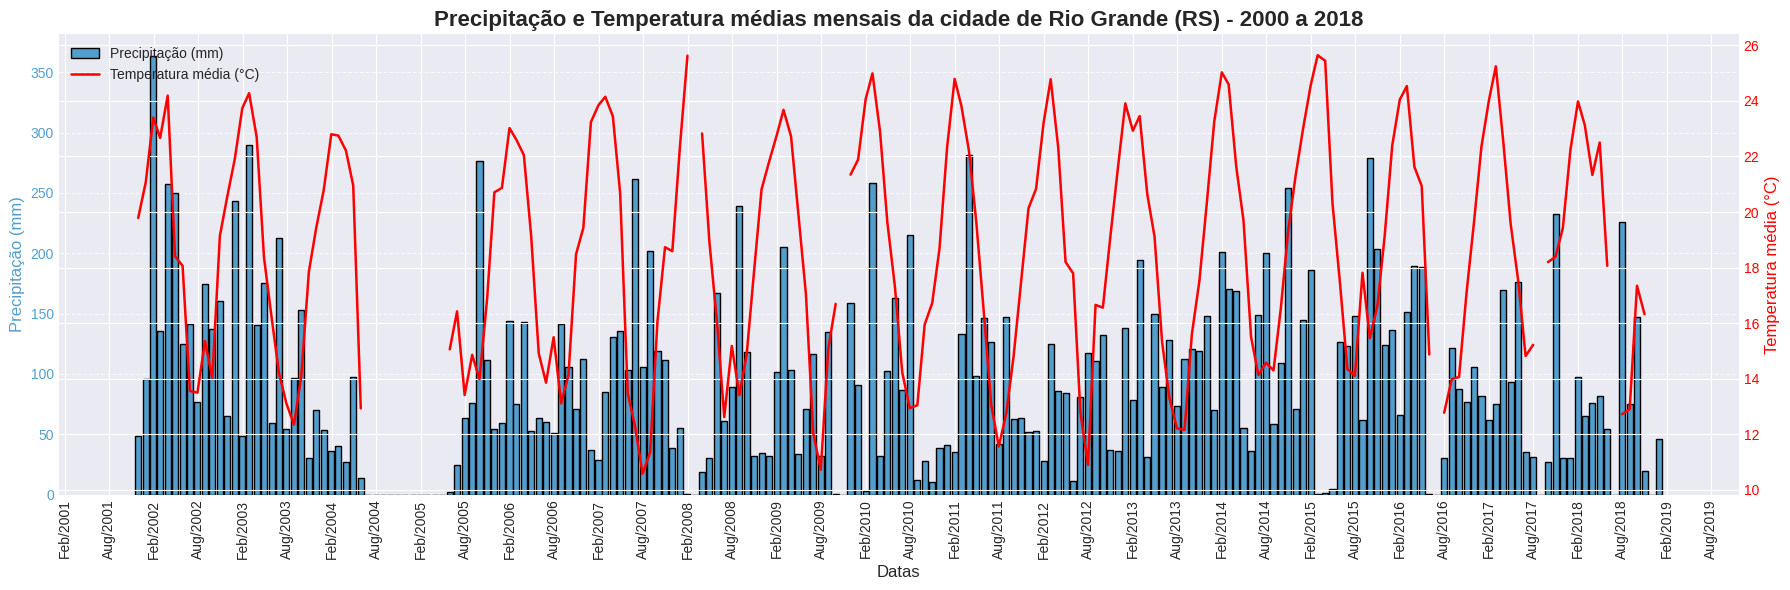


PRECIPITAÇÃO MÁXIMA MENSAL

Valor máximo mensal de precipitação entre 2000 e 2018: 363.2 mm
Data e hora do evento: 2002-01-31 00:00:00


In [ ]:
# exercício 04 - resample
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Reamostragem mensal
prec_mensal = prec.resample("ME").sum()
temp_mensal = tempAR.resample("ME").mean()

plt.style.use("seaborn-v0_8-darkgrid")
fig, ax1 = plt.subplots(figsize=(18, 6))

# Gráfico de barras - Precipitação
ax1.bar(
    prec_mensal.index,
    prec_mensal.values,
    width=25,
    color="#539ecd",
    edgecolor="black",
    label="Precipitação (mm)"
)
ax1.set_xlabel("Datas", fontsize=12)
ax1.set_ylabel("Precipitação (mm)", fontsize=12, color="#539ecd")
ax1.tick_params(axis='y', labelcolor="#539ecd")

# Formatação do eixo X
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.xticks(rotation=90, fontsize=10)

# Grade
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Eixo secundário - Temperatura
ax2 = ax1.twinx()
ax2.plot(
    temp_mensal.index,
    temp_mensal.values,
    color="red",
    linewidth=1.8,
    label="Temperatura média (°C)"
)
ax2.set_ylabel("Temperatura média (°C)", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Título
plt.title("Precipitação e Temperatura médias mensais da cidade de Rio Grande (RS) - 2000 a 2018",
          fontsize=16, fontweight='bold')

# Legenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Layout final
plt.tight_layout()
plt.show()

# Encontrando o máximo valor de precipitação mensal
max_prec = prec_mensal.max()            # valor máximo
max_prec_time = prec_mensal.idxmax()    # data/hora correspondente

print(f"\nPRECIPITAÇÃO MÁXIMA MENSAL")
print(f"\nValor máximo mensal de precipitação entre 2000 e 2018: {max_prec} mm")
print(f"Data e hora do evento: {max_prec_time}")



## Precipitação acumulada anual:

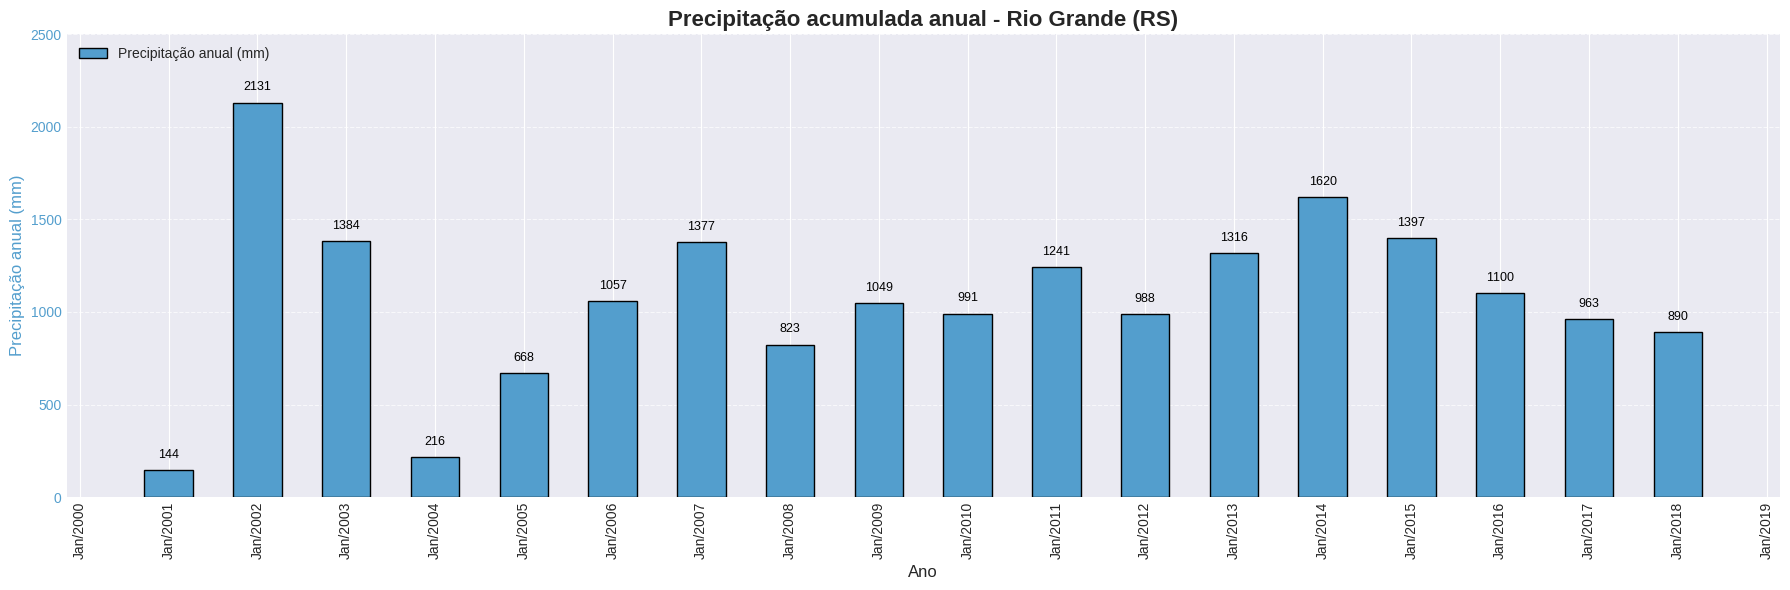


Maior precipitação anual: 2131.2 mm em 2002


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Reamostragem anual (YE = year-end)
prec_anual = prec.resample("YS").sum()

# Estilo do gráfico
plt.style.use("seaborn-v0_8-darkgrid")
fig, ax = plt.subplots(figsize=(18, 6))

# Gráfico de barras da precipitação anual

bars = ax.bar(
    prec_anual.index,
    prec_anual.values,
    width=200,
    color="#539ecd",
    edgecolor="black",
    label="Precipitação anual (mm)"
)

# Adiciona os valores no topo das barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50,                      # pequeno deslocamento acima da barra
        f'{height:.0f}',                  # sem casas decimais
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Eixo X: formatado com mês e ano a cada 6 meses
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.xticks(rotation=90, fontsize=10)

# Eixo Y até 2500
ax.set_ylim(0, 2500)
ax.set_ylabel("Precipitação anual (mm)", fontsize=12, color="#539ecd")
ax.set_xlabel("Ano", fontsize=12)
ax.tick_params(axis='y', labelcolor="#539ecd")

# Título
plt.title("Precipitação acumulada anual - Rio Grande (RS)",
          fontsize=16, fontweight='bold')

# Grade
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Legenda
ax.legend(loc="upper left")

# Layout final
plt.tight_layout()
plt.show()

# Valor e data da maior precipitação anual
max_prec = prec_anual.max()
max_prec_time = prec_anual.idxmax()
print(f"\nMaior precipitação anual: {max_prec} mm em {max_prec_time.strftime('%Y')}")


## Precipitação acumulada sazonalmente:

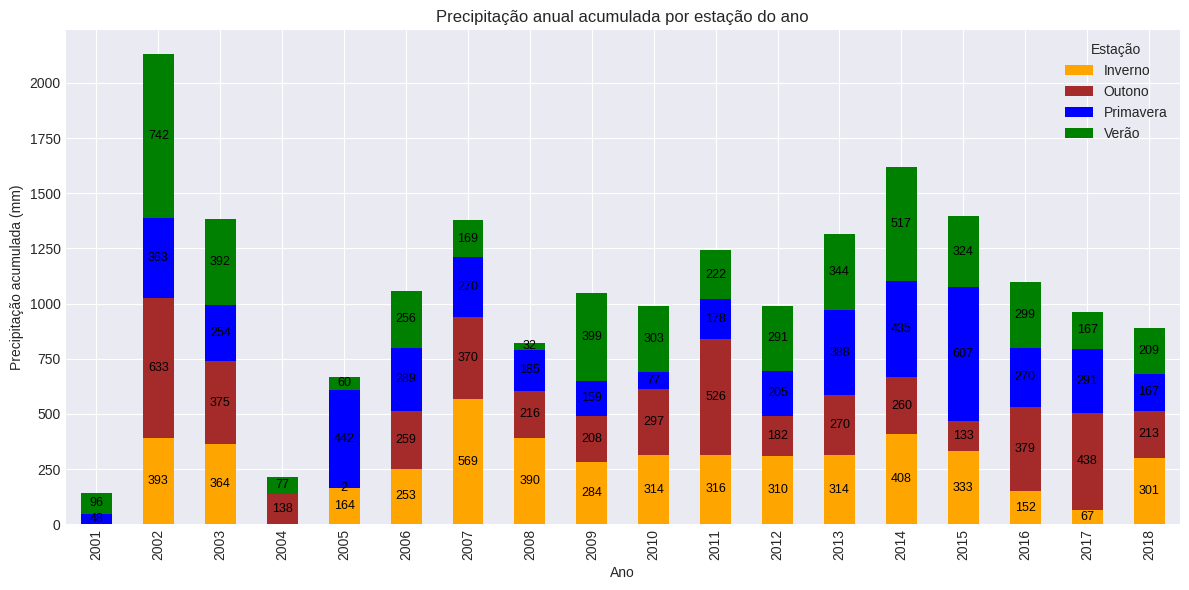

Estacao
Inverno      569.2
Outono       633.0
Primavera    606.8
Verão        742.2
dtype: float64 Estacao
Inverno      2007
Outono       2002
Primavera    2015
Verão        2002
dtype: int32
Estacao
Inverno      66.8
Outono        2.2
Primavera    48.4
Verão        32.0
dtype: float64 Estacao
Inverno      2017
Outono       2005
Primavera    2001
Verão        2008
dtype: int32


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para determinar a estação
def get_estacao(prec):
    mes = prec.month
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

# Código anterior para agrupar por ano e estação
prec_df = prec.to_frame(name='precipitacao')
prec_df['Estacao'] = prec_df.index.map(get_estacao)
prec_df['Ano'] = prec_df.index.year
prec_estacao_ano = prec_df.groupby(['Ano', 'Estacao'])['precipitacao'].sum().unstack()


# Plot empilhado
ax = prec_estacao_ano.plot(
    kind='bar',
    stacked=True,
    color=['orange', 'brown', 'blue', 'green'],
    figsize=(12,6)
)

plt.ylabel("Precipitação acumulada (mm)")
plt.title("Precipitação anual acumulada por estação do ano")
plt.legend(title='Estação')
plt.tight_layout()

# Agora adiciona os valores no gráfico
for i, ano in enumerate(prec_estacao_ano.index):
    cumul = 0  # Para controlar a altura acumulada da barra
    for estacao in prec_estacao_ano.columns:
        valor = prec_estacao_ano.loc[ano, estacao]
        if valor > 0:
            cumul += valor
            # Posição do texto: meio da barra daquela estação no empilhamento
            altura_texto = cumul - valor / 2
            ax.text(
                i,  # posição no eixo X (barra do ano)
                altura_texto,  # posição no eixo Y (meio da parte da barra)
                f'{valor:.0f}',  # texto com valor inteiro
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

plt.show()

prec_max_por_estacao = prec_estacao_ano.max()
prec_max_por_estacao_time = prec_estacao_ano.idxmax()
print(prec_max_por_estacao, prec_max_por_estacao_time)

prec_min_por_estacao = prec_estacao_ano.min()
prec_min_por_estacao_time = prec_estacao_ano.idxmin()
print(prec_min_por_estacao, prec_min_por_estacao_time)
#



## Exercício 05 (30 pontos)

Analisando os gráficos, responda às seguintes perguntas:
1. Qual foi o período/evento de maior chuva? Você se baseou em qual dos quatro gráficos acima para responder, e por quê?
1. Qual foi o período de maior estiagem (seca)? Você se baseou em qual dos quatro gráficos acima para responder, e por quê?
1. Encontra notícias (links) que corroborem a sua análise.

# Exercício 05 - Alana

### Antes de analisarmos os gráficos, vale a pena ressaltar uma observação sobre essa série temporal. Os anos de 2001, 2004 e 2005, embora presentes, foram ignorados na análise dos gráficos de precipitação, pois apresentam falhas significativas em suas séries, a utilização deles nos levaria a conclusões erroneas sobre o comportamento climatológico da cidade de Rio Grande - RS.

1. Qual foi o período/evento de maior chuva? Você se baseou em qual dos quatro gráficos acima para responder, e por quê?
     * O gráfico de Precipitação anual para a cidade de Rio Grande mostra que o maior índice pluviométrico registrado, foi no ano de 2002 com **2131.2 mm** acumulados naquele ano.

     * Embora o maior acumulado ANUAL tenha sido em 2002, considera-se a ocorrência de um evento EXTREMO, como o maior acumulado horário ou diário de uma série temporal. E nesse caso, o evento dessa série ocorreu no dia 10MAR2011, cujo valor máximo diário de precipitação foi de **185.80 mm**, como mostrado no gráfico (zoom) de aculumados diários.

2. Qual foi o período de maior estiagem (seca)? Você se baseou em qual dos quatro gráficos acima para responder, e por quê?

    Para esta análise o melhor gráfico a ser explorado é o acumulado sazonal de cada ano. Abaixo podemos visualizar os maiores e os menores acumulados por estação. Podemos concluir que o Verão de 2008, foi a estação mais seca dessa série, apenas 32.0 mm de precipitação acumulada.

   **Maiores** acumulados de precipitação:
   * Estacao == Precip == Ano
   * Inverno == 569.2 mm == 2007
   * Outono == 633.0 mm == 2002
   * Primavera == 606.8 mm == 2015
   * Verão == 742.2 mm == 2002

   **Menores** acumulados de precipitação:
  * Estacao == Precip == Ano
  * Inverno == 66.8 mm == 2017
  * Outono == 2.2 mm == 2005 (DESCONSIDERADO)
  * Primavera == 48.4 mm == 2001 (DESCONSIDERADO)
  * Verão == 32.0 mm == 2008

3. Os links abaixo corroboram a informação dos dados sobre chuvas fortes no dia 10 de março de 2011, tanto na cidade de Rio Grande quanto em São Lourenço do Sul.

https://noticias.uol.com.br/cotidiano/ultimas-noticias/2011/03/10/chuva-forte-e-enxurrada-no-rs-desabrigam-20-mil-em-sao-lourenco-do-sul.htm
file:///C:/Users/alexa/Downloads/admin,+1.+Juliano+Torres+Fraga+-+Catu00E1strofe+ambiental++rev963-983+alt.pdf

O evento foi tão significativo que houveram diversos trabalho publicados e um dos mais significantes encontra-se abaixo.
http://mtc-m16d.sid.inpe.br/col/sid.inpe.br/mtc-m19/2012/01.18.12.49/doc/publicacao.pdf